In [1]:
import pandas as pd

In [2]:
EtatCivil = pd.read_csv(".//etatcivil.csv", sep=",", index_col=0)

In [3]:
EtatCivil.columns = ['Année', 'Nom', 'Sexe', 'Naissances']
EtatCivil.head(3)

,Année,Nom,Sexe,Naissances
0,1900,Marie,F,48726
1,1900,Jeanne,F,13983
2,1900,Marguerite,F,8059


In [4]:
Fran = EtatCivil[ EtatCivil["Nom"].str.startswith("Fran") ]

In [7]:
Fran

,Année,Nom,Sexe,Naissances
35,1900,Françoise,F,1516
82,1900,Francine,F,471
179,1900,France,F,92
253,1900,Franceline,F,42
377,1900,Francia,F,17
...,...,...,...,...
571220,2016,Francescu-Maria,M,3
571221,2016,Frandy,M,3
571222,2016,Frank,M,3
571223,2016,Franky,M,3


In [11]:
LstFran = Fran["Nom"].unique()

In [12]:
sorted(LstFran)

['Franc',
 'Franca',
 'France',
 'France-Aimée',
 'France-Anne',
 'France-Hélène',
 'France-Laure',
 'France-Line',
 'France-Lise',
 'France-Lyne',
 'France-Marie',
 'France-May',
 'Francelin',
 'Francelina',
 'Franceline',
 'Francelise',
 'Francelle',
 'Francelyne',
 'Francelyse',
 'Frances',
 'Francesa',
 'Francesca',
 'Francesca-Maria',
 'Francesco',
 'Francescu',
 'Francescu-Maria',
 'Franceska',
 'Francette',
 'Franceza',
 'Franchesca',
 'Francheska',
 'Franchette',
 'Franchin',
 'Francia',
 'Franciana',
 'Franciane',
 'Francianne',
 'Francie',
 'Franciette',
 'Francile',
 'Francilia',
 'Francille',
 'Francillette',
 'Francina',
 'Francine',
 'Francinet',
 'Francinette',
 'Francis',
 'Francisa',
 'Francisca',
 'Francisco',
 'Francisco-Javier',
 'Francise',
 'Franciska',
 'Francisque',
 'Franciszek',
 'Franciszka',
 'Francius',
 'Franck',
 'Franck-Alexandre',
 'Franck-Emmanuel',
 'Franck-Olivier',
 'Francki',
 'Franckie',
 'Francklin',
 'Francky',
 'Franco',
 'Francois',
 'Francois

In [15]:
Fran5 = Fran.groupby("Nom").sum().sort_values("Naissances", ascending=False).index.values[:5]

In [16]:
Fran5

array(['Françoise', 'François', 'Franck', 'Francis', 'Francine'],
      dtype=object)

<AxesSubplot: xlabel='Année'>

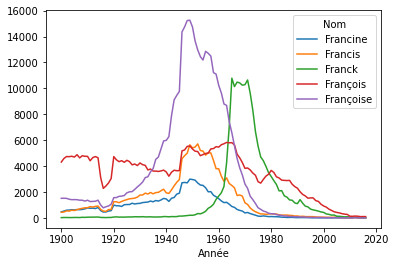

In [18]:
Fran5DF = Fran[Fran["Nom"].isin(Fran5)]
Fran5DF.pivot_table("Naissances", index="Année", columns="Nom", aggfunc=sum).plot()

In [19]:
Camille = EtatCivil.loc[ EtatCivil["Nom"] == "Camille" ]
Camille

,Année,Nom,Sexe,Naissances
60,1900,Camille,F,737
1016,1900,Camille,M,1200
1773,1901,Camille,F,677
2750,1901,Camille,M,1276
3499,1902,Camille,F,730
...,...,...,...,...
539885,2014,Camille,M,993
546009,2015,Camille,F,3017
553008,2015,Camille,M,1066
559038,2016,Camille,F,2698


<AxesSubplot: xlabel='Année'>

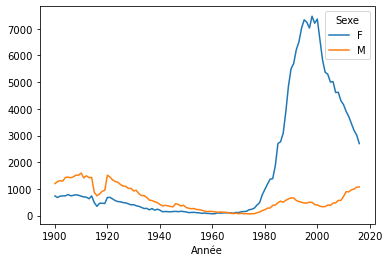

In [20]:
CamilleParSexe = Camille.pivot_table("Naissances", index="Année", columns="Sexe")
CamilleParSexe.plot()

In [21]:
CamilleParSexe

Sexe,F,M
Année,,
1900,737,1200
1901,677,1276
1902,730,1309
1903,739,1295
1904,740,1433
...,...,...
2012,3708,891
2013,3451,967
2014,3192,993


In [22]:
CamilleParSexe["%F"] = CamilleParSexe["F"]/(CamilleParSexe["M"]+CamilleParSexe["F"])

In [23]:
CamilleParSexe["%M"] = CamilleParSexe["M"]/(CamilleParSexe["M"]+CamilleParSexe["F"])

In [24]:
CamilleParSexe

Sexe,F,M,%F,%M
Année,,,,
1900,737,1200,0.380485,0.619515
1901,677,1276,0.346646,0.653354
1902,730,1309,0.358019,0.641981
1903,739,1295,0.363324,0.636676
1904,740,1433,0.340543,0.659457
...,...,...,...,...
2012,3708,891,0.806262,0.193738
2013,3451,967,0.781123,0.218877
2014,3192,993,0.762724,0.237276


In [25]:
del CamilleParSexe["F"]
del CamilleParSexe["M"]

<AxesSubplot: xlabel='Année'>

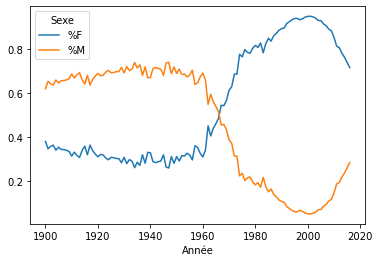

In [26]:
CamilleParSexe.plot()